In [214]:
!pip install nltk

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)



[notice] A new release of pip is available: 24.1.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [215]:
pip install beautifulsoup4


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)



[notice] A new release of pip is available: 24.1.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [216]:
import pandas as pd
import re
from gensim.parsing.preprocessing import STOPWORDS, strip_tags,strip_numeric, strip_punctuation, strip_multiple_whitespaces,remove_stopwords, strip_short, stem_text
import pickle
from transformers import BertTokenizer
import nltk


In [217]:
import numpy as np

In [218]:
import re
import string
from bs4 import BeautifulSoup
from nltk.tokenize import sent_tokenize

In [219]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shashinimashi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [220]:
from nltk.corpus import stopwords

In [221]:
# Load the CSV file
file_path = '/Users/shashinimashi/Desktop/Semester 3/Thesis/Analysis/Research_OAI-1/transcripts.csv'  
df = pd.read_csv(file_path)

In [222]:
df.head()

,ResponseID,Topic,Transcription
0,510,Supporting Responsible Ai Discussion Paper,The Australian Federal Police Afp Welcomes The...
1,507,Safe And Responsible Ai In Australia’,The Disr Have Called For Public Submissions To...
2,506,Safe And Responsible Ai In Australia\r\nDiscus...,The Office Of The Australian Information Commi...
3,505,Canvas Approach To Ai,Canvas Mission Is To Empower The World To Desi...
4,504,Safe And Responsible Ai In\r\nAustralia,The Law Council Welcomes The Opportunity To Pr...


In [223]:
df.columns

Index(['ResponseID', 'Topic', 'Transcription'], dtype='object')

In [224]:
df.value_counts

<bound method DataFrame.value_counts of      ResponseID                                              Topic  \
0           510         Supporting Responsible Ai Discussion Paper   
1           507              Safe And Responsible Ai In Australia’   
2           506  Safe And Responsible Ai In Australia\r\nDiscus...   
3           505                              Canvas Approach To Ai   
4           504            Safe And Responsible Ai In\r\nAustralia   
..          ...                                                ...   
411           7  Epistemic Virtues Of Harnessing Rigorous\r\nMa...   
412           6  Ai Explainability Framework For Environmental ...   
413           4  Submission To Responsible Ai In Australia – Ga...   
414           2  Ben Blackburn Racing Submission\r\nOn The Aust...   
415           1                             Make A General Comment   

                                         Transcription  
0    The Australian Federal Police Afp Welcomes The...  
1    

In [225]:
#  Calculate word count for each transcription
df['word_count'] = df['Transcription'].apply(lambda x: len(str(x).split()))

# Get descriptive statistics for the word count
word_count_stats = df['word_count'].describe()

print(word_count_stats)

count    416.000000
mean     240.641827
std      140.267280
min        1.000000
25%      144.000000
50%      221.000000
75%      309.000000
max      710.000000
Name: word_count, dtype: float64


In [226]:
# Count the non-empty rows in 'Transcription' column
non_empty_rows = df['Transcription'].str.strip().astype(bool).sum()

# Count the empty rows (including NaN values) in 'Transcription' column
empty_rows = df['Transcription'].isna().sum() + (df['Transcription'].str.strip().astype(bool) == False).sum()

# Print the results
print(f"Non-empty rows: {non_empty_rows}")
print(f"Empty rows: {empty_rows}")


Non-empty rows: 416
Empty rows: 8


In [227]:
# Filtering Empty rows
print(f"Rows before filtering: {df.shape[0]}")
df = df[df['Transcription'].str.strip().astype(bool) & df['Transcription'].notna()]
print(f"Rows after filtering: {df.shape[0]}")

Rows before filtering: 416
Rows after filtering: 408


In [228]:
import numpy as np

# Word count check for 'Transcription' column
# Step 1: Calculate word counts for each text in the 'Transcription' column
df['transcription_word_count'] = df['Transcription'].apply(lambda x: len(str(x).split()) if isinstance(x, str) else 0)

# Step 2: Calculate and print statistics for the 'Transcription' column
transcription_avg = np.mean(df['transcription_word_count'])
transcription_min = np.min(df['transcription_word_count'])
transcription_max = np.max(df['transcription_word_count'])

# Step 3: Display the statistics
print(f"Transcription - Average length: {transcription_avg:.2f} words")
print(f"Transcription - Minimum length: {transcription_min} words")
print(f"Transcription - Maximum length: {transcription_max} words")

# Optional: Display the word counts in the DataFrame for better insight
print("\nText Lengths (Word Counts) per Text:")
print(df[['Transcription', 'transcription_word_count']].head())

Transcription - Average length: 245.34 words
Transcription - Minimum length: 1 words
Transcription - Maximum length: 710 words

Text Lengths (Word Counts) per Text:
                                       Transcription  transcription_word_count
0  The Australian Federal Police Afp Welcomes The...                       518
1  The Disr Have Called For Public Submissions To...                       213
2  The Office Of The Australian Information Commi...                       545
3  Canvas Mission Is To Empower The World To Desi...                       103
4  The Law Council Welcomes The Opportunity To Pr...                       410


/var/folders/s1/xx81lcvn0kq8swqwckfrftb40000gn/T/ipykernel_56461/2615125692.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transcription_word_count'] = df['Transcription'].apply(lambda x: len(str(x).split()) if isinstance(x, str) else 0)


Text(0, 0.5, 'Frequency')

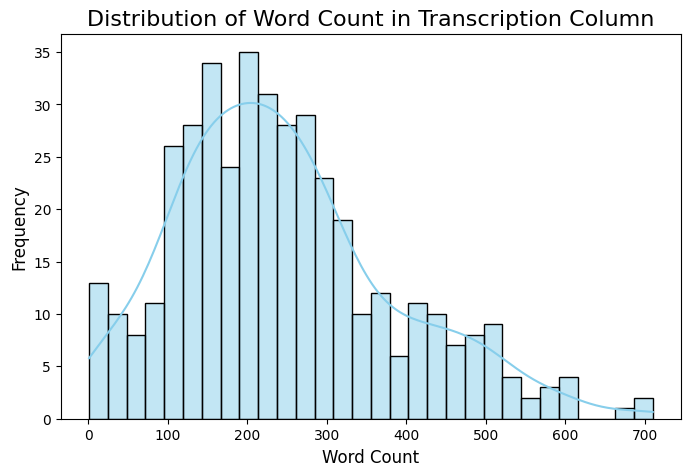

In [229]:
# Histogram of word counts
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(df['transcription_word_count'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Word Count in Transcription Column', fontsize=16)
plt.xlabel('Word Count', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

In [230]:
import re
import string
from transformers import BertTokenizer
from bs4 import BeautifulSoup
import nltk
import pandas as pd  

# Download NLTK data for sentence tokenization (ensure 'punkt' is available)
nltk.download('punkt')

# Initialize BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

def clean_and_tokenize(df, column_name='Transcription'):
    
    # Ensure the column exists in the DataFrame
    if column_name not in df.columns:
        print(f"Error: Column '{column_name}' not found in the DataFrame.")
        return df
    
    def clean_text(text):
        if not text or pd.isna(text):  # Check for empty or NaN values
            return []  # Return an empty list if the text is invalid

        # Lowercase the text
        text = text.lower()
        
        # Remove URLs
        text = re.sub(r"http\S+|www\S+|https\S+", "", text, flags=re.MULTILINE)
        
        # Remove HTML tags
        text = BeautifulSoup(text, "html.parser").get_text()
        
        # Remove punctuation
        text = text.translate(str.maketrans("", "", string.punctuation))
        
        # Remove special characters and numbers
        text = re.sub(r"[^a-zA-Z\s]", "", text)

        # Normalize multiple spaces to a single space
        text = re.sub(r'\s+', ' ', text).strip()
        
        # Tokenize the text using BERT tokenizer (subword-level)
        tokens = tokenizer.tokenize(text)
        
        # Rejoin tokens into a single string
        cleaned_text = " ".join(tokens)
        
        # Alternative sentence tokenization using re.split()
        sentences = re.split(r'(?<=[.!?])\s+', cleaned_text)
        
        return sentences

    # Debug: Print first few rows before cleaning
    print(f"First few rows of the column '{column_name}':")
    print(df[column_name].head())
    
    # Apply the clean_text function to each entry in the column
    df['Responses'] = df[column_name].apply(clean_text)
    
    # Debug: Check if the Responses column has been added
    if 'Responses' in df.columns:
        print(f"'Responses' column has been created successfully.")
    else:
        print(f"Error: 'Responses' column not created.")
    
    # Print the DataFrame with Transcriptions and Responses
    print(df[['Transcription', 'Responses']].head())
    
    return df

# Output
df_cleaned = clean_and_tokenize(df)


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/shashinimashi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


First few rows of the column 'Transcription':
0    The Australian Federal Police Afp Welcomes The...
1    The Disr Have Called For Public Submissions To...
2    The Office Of The Australian Information Commi...
3    Canvas Mission Is To Empower The World To Desi...
4    The Law Council Welcomes The Opportunity To Pr...
Name: Transcription, dtype: object
'Responses' column has been created successfully.
                                       Transcription  \
0  The Australian Federal Police Afp Welcomes The...   
1  The Disr Have Called For Public Submissions To...   
2  The Office Of The Australian Information Commi...   
3  Canvas Mission Is To Empower The World To Desi...   
4  The Law Council Welcomes The Opportunity To Pr...   

                                           Responses  
0  [the australian federal police af ##p welcome ...  
1  [the di ##sr have called for public submission...  
2  [the office of the australian information comm...  
3  [canvas mission is to em ##power t

/var/folders/s1/xx81lcvn0kq8swqwckfrftb40000gn/T/ipykernel_56461/2575543807.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Responses'] = df[column_name].apply(clean_text)


In [258]:
df_cleaned.head()

,ResponseID,Topic,Transcription,word_count,transcription_word_count,Responses
0,510,Supporting Responsible Ai Discussion Paper,The Australian Federal Police Afp Welcomes The...,550,518,[the australian federal police af ##p welcome ...
1,507,Safe And Responsible Ai In Australia’,The Disr Have Called For Public Submissions To...,226,213,[the di ##sr have called for public submission...
2,506,Safe And Responsible Ai In Australia\r\nDiscus...,The Office Of The Australian Information Commi...,579,545,[the office of the australian information comm...
3,505,Canvas Approach To Ai,Canvas Mission Is To Empower The World To Desi...,108,103,[canvas mission is to em ##power the world to ...
4,504,Safe And Responsible Ai In\r\nAustralia,The Law Council Welcomes The Opportunity To Pr...,436,410,[the law council welcome ##s the opportunity t...


In [259]:
#  Calculate word count for each Response
df_cleaned['word_count'] = df_cleaned['Responses'].apply(lambda x: len(str(x).split()))

# Get descriptive statistics for the word count
word_count_stats = df_cleaned['word_count'].describe()

print(word_count_stats)

count    408.000000
mean     264.850490
std      149.770027
min        1.000000
25%      157.750000
50%      243.500000
75%      341.000000
max      786.000000
Name: word_count, dtype: float64


/var/folders/s1/xx81lcvn0kq8swqwckfrftb40000gn/T/ipykernel_56461/2871606896.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['word_count'] = df_cleaned['Responses'].apply(lambda x: len(str(x).split()))


In [305]:
# Save the cleaned DataFrame to a CSV file
df_cleaned.to_csv("df_cleaned.csv", index=False)
print("Preprocessed data saved to df_cleaned.csv")


Preprocessed data saved to df_cleaned.csv


Train/Validation/Test Split

In [ ]:
# from sklearn.model_selection import train_test_split

# train_df, temp_df = train_test_split(df_cleaned, test_size=0.2, random_state=42)  # 80% training data
# val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)  # 10% validation, 10% test

# print(f"Training Set: {len(train_df)}")
# print(f"Validation Set: {len(val_df)}")
# print(f"Test Set: {len(test_df)}")

In [ ]:
#Check how many valid responses are left
#print(f"Valid Train Responses: {len([r for r in train_responses if r != ''])}")
#print(f"Valid Validation Responses: {len([r for r in val_responses if r != ''])}")
#print(f"Valid Test Responses: {len([r for r in test_responses if r != ''])}")

In [237]:
# # Check the first few responses after cleaning
# print(train_df['Responses'].head())
# print(val_df['Responses'].head())
# print(test_df['Responses'].head())

# # Check if there are any empty or None values
# empty_train_responses = train_df['Responses'].apply(lambda x: len(x) == 0 if isinstance(x, list) else True)
# empty_val_responses = val_df['Responses'].apply(lambda x: len(x) == 0 if isinstance(x, list) else True)
# empty_test_responses = test_df['Responses'].apply(lambda x: len(x) == 0 if isinstance(x, list) else True)

# print(f"Empty Train Responses: {empty_train_responses.sum()}")
# print(f"Empty Validation Responses: {empty_val_responses.sum()}")
# print(f"Empty Test Responses: {empty_test_responses.sum()}")


339    [the paper does not acknowledge the catastroph...
3      [canvas mission is to em ##power the world to ...
18     [the interactive games entertainment associati...
133    [king wood mall ##eson ##s welcome ##s the opp...
120    [this submission concerns the formation of ai ...
Name: Responses, dtype: object
33     [the centre for media transition is conducting...
235    [this response to the australian government th...
82     [crest brings a multi ##dis ##ci ##plin ##ary ...
252    [que ##son how can the australian government f...
343    [australia post appreciate ##s the opportunity...
Name: Responses, dtype: object
134    [the financial services council f ##sc welcome...
70     [property exchange australia ltd pe ##xa is pl...
294    [there exist several potential risks from arti...
96     [thank you for the opportunity to respond to t...
9      [banks have a history of using technology to i...
Name: Responses, dtype: object
Empty Train Responses: 0
Empty Validation Responses:

Embedding Creation

In [261]:
from sentence_transformers import SentenceTransformer
import torch
import numpy as np

# Initialize the SentenceTransformer model (all-mpnet-base-v2)
model = SentenceTransformer('all-mpnet-base-v2')

# Function to generate sentence embeddings
def get_sentence_embeddings(text_list):
    # Generate sentence embeddings for the text list
    return model.encode(text_list, convert_to_tensor=True)

# Flatten the list of sentences (Responses are lists of sentences, so flatten them into one list)
def flatten_responses(responses):
    return [sentence for response in responses for sentence in response]

# Ensure `df_cleaned` contains the `Responses` column
if 'Responses' in df_cleaned.columns:
    # Flatten the Responses column
    flat_responses = flatten_responses(df_cleaned['Responses'].tolist())

    # Generate embeddings for the flattened responses
    flat_embeddings = get_sentence_embeddings(flat_responses)

    # Group by ResponseID and apply mean pooling to get one embedding per response
    def group_by_response_id(df, embeddings):
        response_embeddings = {}
        embedding_idx = 0  # Index to track embeddings for sentences

        for response_id in df['ResponseID'].unique():
            # Get all sentences for the given ResponseID
            sentences = df[df['ResponseID'] == response_id]['Responses'].tolist()
            
            # Flatten the sentences for the ResponseID
            sentences_flat = flatten_responses(sentences)
            
            # Extract corresponding embeddings
            num_sentences = len(sentences_flat)
            sentences_embeddings = embeddings[embedding_idx: embedding_idx + num_sentences]
            embedding_idx += num_sentences
            
            # Apply mean pooling using PyTorch's .mean() method
            response_embeddings[response_id] = sentences_embeddings.mean(dim=0)  # Mean Pooling
        
        return response_embeddings

    # Generate response embeddings for all responses in df_cleaned
    response_embeddings = group_by_response_id(df_cleaned, flat_embeddings)

    # `response_embeddings` now contains a dictionary mapping ResponseID to its mean-pooled embedding
    print("Embeddings generated successfully!")
else:
    print("Error: `Responses` column not found in the DataFrame.")


Embeddings generated successfully!


In [306]:
import pickle

# Save response_embeddings to a file
with open("response_embeddings.pkl", "wb") as f:
    pickle.dump(response_embeddings, f)
print("Response embeddings saved to response_embeddings.pkl")


Response embeddings saved to response_embeddings.pkl



Cosine Similarity Calculation with static Threshold

In [299]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import normalize
from sentence_transformers import SentenceTransformer
from transformers import T5Tokenizer, T5ForConditionalGeneration

# Initialize the SentenceTransformer and T5 models
model = SentenceTransformer('all-mpnet-base-v2')
t5_tokenizer = T5Tokenizer.from_pretrained("t5-small")
t5_model = T5ForConditionalGeneration.from_pretrained("t5-small")

# Step 1: Accept User Keywords
user_keywords = input("Enter keywords for summarization (comma-separated): ")
user_keywords = [kw.strip() for kw in user_keywords.split(",")]

# Step 2: Generate Embeddings for User Keywords
keyword_embeddings = model.encode(user_keywords, convert_to_tensor=True)
keyword_embeddings_cpu = normalize(keyword_embeddings.cpu().numpy(), axis=1)

# Function to calculate cosine similarity
def calculate_cosine_similarity(query_embeddings, response_embeddings):
    similarities = {}
    for response_id, embedding in response_embeddings.items():
        # Normalize response embeddings
        response_embedding_numpy = embedding.detach().cpu().numpy()
        response_embedding_normalized = normalize(response_embedding_numpy.reshape(1, -1), axis=1)
        
        # Calculate cosine similarity for all user keywords
        max_similarity = max(
            cosine_similarity(query_embeddings, response_embedding_normalized).flatten()
        )
        similarities[response_id] = max_similarity
    return similarities

# Example threshold and fallback count
THRESHOLD = 0.40
TOP_N = 5  # Fallback: Select top N responses if no responses pass the threshold

# Step 3: Calculate cosine similarity between user keyword embeddings and response embeddings
response_similarities = {}
for response_id, embedding in response_embeddings.items():
    # Calculate cosine similarity
    response_similarities[response_id] = calculate_cosine_similarity(keyword_embeddings_cpu, {response_id: embedding})[response_id]

# Step 4: Filter responses based on threshold
filtered_responses = {
    response_id: sim for response_id, sim in response_similarities.items() if sim >= THRESHOLD
}

# Fallback: If no responses pass the threshold, select the top N most similar responses
if not filtered_responses:
    print("\nNo responses passed the threshold. Using fallback mechanism.")
    filtered_responses = dict(
        sorted(response_similarities.items(), key=lambda x: x[1], reverse=True)[:TOP_N]
    )

# Display filtered responses
print("\nFiltered Responses:")
print(filtered_responses)

# Step 5: Fetch the filtered responses' text
filtered_texts = [
    " ".join(df_cleaned.loc[df_cleaned['ResponseID'] == resp_id, 'Responses'].values[0])
    for resp_id in filtered_responses.keys()
]

# Handle case where no responses are found
if not filtered_texts:
    filtered_texts = ["No relevant responses found."]

# Step 6: Prepare input for T5 summarization
input_text = "summarize: " + " ".join(filtered_texts)
input_ids = t5_tokenizer.encode(input_text, return_tensors="pt", truncation=True)

# Step 7: Generate summary with T5
summary_ids = t5_model.generate(input_ids, max_length=200, num_beams=8, length_penalty=1.5, early_stopping=True)
summary = t5_tokenizer.decode(summary_ids[0], skip_special_tokens=True)

# Display the generated summary
print("\nGenerated Summary:")
print(summary)


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.



Filtered Responses:
{433: 0.4345435}

Generated Summary:
royal aus ##tral ##asian college of medical administrators ra ##cm ##a is unique as a provider of medical management and leadership qualifications. the fellowship training program offered by ra ##cm ##a is accredited by the australian medical council and the new zealand medical council fellows of our college are recognised as medical specialists our education programs are aimed at e ##qui ##pping doctors with the leadership and management skills needed to influence and lead the aus ##tral


Evaluation

In [266]:
pip install bert-score

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 2.6 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.1.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [300]:
# Combine the text of the filtered responses into a single reference string
filtered_reference = " ".join([
    " ".join(df_cleaned.loc[df_cleaned['ResponseID'] == resp_id, 'Responses'].values[0])
    for resp_id in filtered_responses.keys()
])



In [301]:
print("\nFiltered Reference Text:")
print(filtered_reference)



Filtered Reference Text:
the royal aus ##tral ##asian college of medical administrators ra ##cm ##a is unique as a provider of medical management and leadership qualifications as it is the only specialist medical educator whose programs are recognised for the granting of specialist registration in medical administration the fellowship training program offered by ra ##cm ##a is accredited by the australian medical council and the new zealand medical council fellows of our college are recognised as medical specialists our education programs are aimed at e ##qui ##pping doctors with the leadership and management skills needed to influence and lead the aus ##tral ##asian health care systems with the clear aim of improving health outcomes of australians and new zealand ##ers the value of ra ##cm ##a is its members who strive to lead for change and positive outcomes for all australians new zealand ##ers and peoples in all parts of the world in which their members practice demonstrating thei

In [302]:
from rouge_score import rouge_scorer
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
from bert_score import score

# Initialize ROUGE scorer
rouge_scorer = rouge_scorer.RougeScorer(['rouge1', 'rougeL'], use_stemmer=True)

# Compute ROUGE
rouge_scores = rouge_scorer.score(filtered_reference, summary)  # Use the combined reference text
rouge_1_fmeasure = rouge_scores['rouge1'].fmeasure
rouge_l_fmeasure = rouge_scores['rougeL'].fmeasure

# Compute BLEU
bleu_score = sentence_bleu(
    [filtered_reference.split()],  # Tokenized reference
    summary.split(),               # Tokenized generated summary
    smoothing_function=SmoothingFunction().method1  # Smoothing for short outputs
)

# Compute BERTScore
P, R, F1 = score(
    [summary],                     # List of generated summaries
    [filtered_reference],          # List of reference texts (filtered responses)
    lang="en",                     # Language (e.g., English)
    verbose=True                   # Show progress
)

# Display all metrics
print(f"\nEvaluation Metrics:")
print(f"ROUGE-1 F-Measure: {rouge_1_fmeasure:.4f}")
print(f"ROUGE-L F-Measure: {rouge_l_fmeasure:.4f}")
print(f"BLEU Score: {bleu_score:.4f}")
print(f"BERTScore Precision: {P.mean():.4f}")
print(f"BERTScore Recall: {R.mean():.4f}")
print(f"BERTScore F1: {F1.mean():.4f}")


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  1.18it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 109.00it/s]

done in 0.90 seconds, 1.11 sentences/sec

Evaluation Metrics:
ROUGE-1 F-Measure: 0.4984
ROUGE-L F-Measure: 0.4984
BLEU Score: 0.1291
BERTScore Precision: 0.9607
BERTScore Recall: 0.8693
BERTScore F1: 0.9127


Static Threshold
Keywords: medical,clinical
Evaluation Metrics: Threshold 0.2
ROUGE-1 F-Measure: 0.0126
ROUGE-L F-Measure: 0.0126
BLEU Score: 0.0000
BERTScore Precision: 0.9437
BERTScore Recall: 0.8227
BERTScore F1: 0.8791

Grid Search Threshold
Evaluation Metrics:04 
ROUGE-1 F-Measure: 0.4984
ROUGE-L F-Measure: 0.4984
BLEU Score: 0.1291
BERTScore Precision: 0.9607
BERTScore Recall: 0.8693
BERTScore F1: 0.9127

Dynamic Threshold
Evaluation Metrics:
ROUGE-1 F-Measure: 0.1942
ROUGE-L F-Measure: 0.1165
BLEU Score: 0.0019
BERTScore Precision: 0.8272
BERTScore Recall: 0.7876
BERTScore F1: 0.8069

Applying Grid search for Threshold optimization

In [282]:
import numpy as np
from rouge_score import rouge_scorer
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
from bert_score import score

# Initialize ROUGE scorer
rouge_scorer = rouge_scorer.RougeScorer(['rouge1', 'rougeL'], use_stemmer=True)

# Define variables to track the best threshold and score
best_threshold = None
best_rouge1_fmeasure = -1

# Define the range of thresholds to test
threshold_range = np.arange(0.0, 1.01, 0.01)  # From 0.0 to 1.0 with 0.01 increments

# Perform grid search
for threshold in threshold_range:
    # Filter responses based on the current threshold
    filtered_responses = {
        response_id: sim for response_id, sim in response_similarities.items() if sim >= threshold
    }
    
    # Skip if no responses pass the threshold
    if not filtered_responses:
        continue

    # Combine filtered responses into a single reference string
    filtered_reference = " ".join([
        " ".join(df_cleaned.loc[df_cleaned['ResponseID'] == resp_id, 'Responses'].values[0])
        for resp_id in filtered_responses.keys()
    ])

    # Generate summary 
    summary_ids = t5_model.generate(input_ids, max_length=200, num_beams=8, length_penalty=1.5, early_stopping=True)
    summary = t5_tokenizer.decode(summary_ids[0], skip_special_tokens=True)

    # Display the generated summary
    print("\nGenerated Summary:")
    print(summary)

    # Assume generate_summary as the summarization function
    input_text = "summarize: " + filtered_reference
    input_ids = t5_tokenizer.encode(input_text, return_tensors="pt", truncation=True)
    summary_ids = t5_model.generate(input_ids, max_length=150, num_beams=5, early_stopping=True)
    summary = t5_tokenizer.decode(summary_ids[0], skip_special_tokens=True)

    # Evaluate using ROUGE-1 F-Measure
    rouge_scores = rouge_scorer.score(filtered_reference, summary)
    rouge1_fmeasure = rouge_scores['rouge1'].fmeasure

    # Update the best threshold if the current one is better
    if rouge1_fmeasure > best_rouge1_fmeasure:
        best_rouge1_fmeasure = rouge1_fmeasure
        best_threshold = threshold

    # Optionally, print progress for debugging
    print(f"Threshold: {threshold:.2f}, ROUGE-1 F-Measure: {rouge1_fmeasure:.4f}")

# Output the best threshold and score
print(f"\nOptimal Threshold: {best_threshold:.2f} with ROUGE-1 F-Measure: {best_rouge1_fmeasure:.4f}")



Generated Summary:
department of health and aged care welcomes ##s the discussion paper released by the department of industry science and resources di ##sr on safe and responsible ai in australia. artificial intelligence ai is an emerging capability that has the potential to transform wide areas of the economy and improve lives it is expected to have significant impacts in the healthcare sector ai is advancing quickly and will likely generate disrupt ##ive innovation across many parts of society.
Threshold: 0.00, ROUGE-1 F-Measure: 0.0014

Generated Summary:
australian federal police af ##p welcome ##s the opportunity to make a submission to the department of industry science and resources public consultation on safe and responsible artificial intelligence ai in australia this submission addresses both identified criminal threats relating to ai and considerations for the use of ai. the af ##p has responsibility for enforcing commonwealth criminal law contributing to combat ##ing comp

Dynamic Threshold based on Similarity Score method

In [303]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import normalize
from sentence_transformers import SentenceTransformer
from transformers import T5Tokenizer, T5ForConditionalGeneration
import numpy as np

# Initialize the SentenceTransformer and T5 models
model = SentenceTransformer('all-mpnet-base-v2')
t5_tokenizer = T5Tokenizer.from_pretrained("t5-small")
t5_model = T5ForConditionalGeneration.from_pretrained("t5-small")

# Step 1: Accept User Keywords
user_keywords = input("Enter keywords for summarization (comma-separated): ")
user_keywords = [kw.strip() for kw in user_keywords.split(",")]

# Step 2: Generate Embeddings for User Keywords
keyword_embeddings = model.encode(user_keywords, convert_to_tensor=True)
keyword_embeddings_cpu = normalize(keyword_embeddings.cpu().numpy(), axis=1)

# Function to calculate cosine similarity
def calculate_cosine_similarity(query_embeddings, response_embeddings):
    similarities = {}
    for response_id, embedding in response_embeddings.items():
        # Normalize response embeddings
        response_embedding_numpy = embedding.detach().cpu().numpy()
        response_embedding_normalized = normalize(response_embedding_numpy.reshape(1, -1), axis=1)
        
        # Calculate cosine similarity for all user keywords
        max_similarity = max(
            cosine_similarity(query_embeddings, response_embedding_normalized).flatten()
        )
        similarities[response_id] = max_similarity
    return similarities

# Step 3: Calculate cosine similarity between user keyword embeddings and response embeddings
response_similarities = {}
for response_id, embedding in response_embeddings.items():
    # Calculate cosine similarity
    response_similarities[response_id] = calculate_cosine_similarity(keyword_embeddings_cpu, {response_id: embedding})[response_id]

# Step 4: Compute the Dynamic Threshold
# Dynamic threshold based on mean + standard deviation of similarity scores
similarity_scores = list(response_similarities.values())
mean_similarity = np.mean(similarity_scores)
std_similarity = np.std(similarity_scores)
dynamic_threshold = mean_similarity + std_similarity

print(f"\nDynamic Threshold: {dynamic_threshold:.4f}")

# Step 5: Filter responses based on the dynamic threshold
filtered_responses = {
    response_id: sim for response_id, sim in response_similarities.items() if sim >= dynamic_threshold
}

# Fallback: If no responses pass the threshold, select the top N most similar responses
TOP_N = 5
if not filtered_responses:
    print("\nNo responses passed the dynamic threshold. Using fallback mechanism.")
    filtered_responses = dict(
        sorted(response_similarities.items(), key=lambda x: x[1], reverse=True)[:TOP_N]
    )

# Display filtered responses
print("\nFiltered Responses:")
print(filtered_responses)

# Step 6: Fetch the filtered responses' text
filtered_texts = [
    " ".join(df_cleaned.loc[df_cleaned['ResponseID'] == resp_id, 'Responses'].values[0])
    for resp_id in filtered_responses.keys()
]

# Handle case where no responses are found
if not filtered_texts:
    filtered_texts = ["No relevant responses found."]

# Step 7: Prepare input for T5 summarization
input_text = "summarize: " + " ".join(filtered_texts)
input_ids = t5_tokenizer.encode(input_text, return_tensors="pt", truncation=True)

# Step 8: Generate summary with T5
summary_ids = t5_model.generate(input_ids, max_length=200, num_beams=8, length_penalty=1.5, early_stopping=True)
summary = t5_tokenizer.decode(summary_ids[0], skip_special_tokens=True)

# Display the generated summary
print("\nGenerated Summary:")
print(summary)


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.



Dynamic Threshold: 0.1943

Filtered Responses:
{501: 0.3214892, 487: 0.28845337, 484: 0.28588706, 459: 0.3135083, 456: 0.19475144, 433: 0.4345435, 432: 0.33562458, 428: 0.3259278, 388: 0.22591971, 379: 0.3166092, 368: 0.20993409, 354: 0.307584, 337: 0.3619985, 335: 0.19888848, 318: 0.24295926, 288: 0.33239985, 282: 0.20518482, 272: 0.25665125, 270: 0.3357447, 269: 0.29243273, 261: 0.26826602, 254: 0.20108172, 236: 0.32821319, 235: 0.39185894, 222: 0.3081241, 218: 0.20083797, 214: 0.28457117, 167: 0.22784068, 161: 0.20732924, 158: 0.20518467, 118: 0.32784605, 116: 0.33611903, 111: 0.20528916, 71: 0.26874042, 70: 0.27302998, 67: 0.27488136, 65: 0.2516881, 59: 0.3099209, 58: 0.39038882, 53: 0.25899515, 49: 0.21935953, 7: 0.357951}

Generated Summary:
department of health and aged care welcomes ##s the discussion paper released by the department of industry science and resources di ##sr on safe and responsible ai in australia. artificial intelligence ai is an emerging capability that has 

In [304]:
#Evaluate the Summary with Dynamic threshold method
import numpy as np
from rouge_score import rouge_scorer
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
from bert_score import score

# Initialize ROUGE scorer
rouge_scorer = rouge_scorer.RougeScorer(['rouge1', 'rougeL'], use_stemmer=True)

# Compute ROUGE
rouge_scores = rouge_scorer.score(filtered_reference, summary)  # Use the combined reference text
rouge_1_fmeasure = rouge_scores['rouge1'].fmeasure
rouge_l_fmeasure = rouge_scores['rougeL'].fmeasure

# Compute BLEU
bleu_score = sentence_bleu(
    [filtered_reference.split()],  # Tokenized reference
    summary.split(),               # Tokenized generated summary
    smoothing_function=SmoothingFunction().method1  # Smoothing for short outputs
)

# Compute BERTScore
P, R, F1 = score(
    [summary],                     # List of generated summaries
    [filtered_reference],          # List of reference texts (filtered responses)
    lang="en",                     # Language (e.g., English)
    verbose=True                   # Show progress
)

# Display all metrics
print(f"\nEvaluation Metrics:")
print(f"ROUGE-1 F-Measure: {rouge_1_fmeasure:.4f}")
print(f"ROUGE-L F-Measure: {rouge_l_fmeasure:.4f}")
print(f"BLEU Score: {bleu_score:.4f}")
print(f"BERTScore Precision: {P.mean():.4f}")
print(f"BERTScore Recall: {R.mean():.4f}")
print(f"BERTScore F1: {F1.mean():.4f}")

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  1.18it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 103.15it/s]

done in 0.87 seconds, 1.14 sentences/sec

Evaluation Metrics:
ROUGE-1 F-Measure: 0.1942
ROUGE-L F-Measure: 0.1165
BLEU Score: 0.0019
BERTScore Precision: 0.8272
BERTScore Recall: 0.7876
BERTScore F1: 0.8069


Dynamic Grid search Threshold optimization

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import normalize
from sentence_transformers import SentenceTransformer
from transformers import T5Tokenizer, T5ForConditionalGeneration
from rouge_score import rouge_scorer
import numpy as np

# Initialize the SentenceTransformer and T5 models
model = SentenceTransformer('all-mpnet-base-v2')
t5_tokenizer = T5Tokenizer.from_pretrained("t5-small")
t5_model = T5ForConditionalGeneration.from_pretrained("t5-small")

# Step 1: Accept User Keywords
user_keywords = input("Enter keywords for summarization (comma-separated): ")
user_keywords = [kw.strip() for kw in user_keywords.split(",")]

# Step 2: Generate Embeddings for User Keywords
keyword_embeddings = model.encode(user_keywords, convert_to_tensor=True)
keyword_embeddings_cpu = normalize(keyword_embeddings.cpu().numpy(), axis=1)

# Function to calculate cosine similarity
def calculate_cosine_similarity(query_embeddings, response_embeddings):
    similarities = {}
    for response_id, embedding in response_embeddings.items():
        # Normalize response embeddings
        response_embedding_numpy = embedding.detach().cpu().numpy()
        response_embedding_normalized = normalize(response_embedding_numpy.reshape(1, -1), axis=1)
        
        # Calculate cosine similarity for all user keywords
        max_similarity = max(
            cosine_similarity(query_embeddings, response_embedding_normalized).flatten()
        )
        similarities[response_id] = max_similarity
    return similarities

# Step 3: Calculate cosine similarity between user keyword embeddings and response embeddings
response_similarities = {}
for response_id, embedding in response_embeddings.items():
    # Calculate cosine similarity
    response_similarities[response_id] = calculate_cosine_similarity(keyword_embeddings_cpu, {response_id: embedding})[response_id]

# Step 4: Dynamic Grid Search to Find the Best Threshold
threshold_range = np.arange(0.0, 1.01, 0.01)  # From 0.0 to 1.0 with 0.01 increments
best_threshold = None
best_rouge1_fmeasure = -float("inf")
filtered_responses_best = None

# Placeholder for reference summary
filtered_reference = "Reference summary for evaluation purposes."  # Replace with your actual reference

for threshold in threshold_range:
    # Filter responses based on the current threshold
    filtered_responses = {
        response_id: sim for response_id, sim in response_similarities.items() if sim >= threshold
    }

    # Fetch the filtered responses' text
    filtered_texts = [
        " ".join(df_cleaned.loc[df_cleaned['ResponseID'] == resp_id, 'Responses'].values[0])
        for resp_id in filtered_responses.keys()
    ]

    if not filtered_texts:  # Skip if no responses are filtered
        continue

    # Prepare input for T5 summarization
    input_text = "summarize: " + " ".join(filtered_texts)
    input_ids = t5_tokenizer.encode(input_text, return_tensors="pt", truncation=True)

    # Generate summary
    summary_ids = t5_model.generate(input_ids, max_length=200, num_beams=4, early_stopping=True)
    summary = t5_tokenizer.decode(summary_ids[0], skip_special_tokens=True)

    # Evaluate using ROUGE-1 F-Measure
    rouge_scorer_instance = rouge_scorer.RougeScorer(['rouge1'], use_stemmer=True)
    rouge_scores = rouge_scorer_instance.score(filtered_reference, summary)
    rouge1_fmeasure = rouge_scores['rouge1'].fmeasure

    # Update the best threshold if the current one is better
    if rouge1_fmeasure > best_rouge1_fmeasure:
        best_rouge1_fmeasure = rouge1_fmeasure
        best_threshold = threshold
        filtered_responses_best = filtered_responses

print(f"\nBest Threshold: {best_threshold:.4f}")

# Step 5: Use the Best Threshold to Generate Final Summary
if filtered_responses_best:
    final_texts = [
        " ".join(df_cleaned.loc[df_cleaned['ResponseID'] == resp_id, 'Responses'].values[0])
        for resp_id in filtered_responses_best.keys()
    ]
    input_text = "summarize: " + " ".join(final_texts)
    input_ids = t5_tokenizer.encode(input_text, return_tensors="pt", truncation=True)
    summary_ids = t5_model.generate(input_ids, max_length=200, num_beams=4, early_stopping=True)
    final_summary = t5_tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    print("\nGenerated Summary:")
    print(final_summary)
else:
    print("No relevant responses found.")
